In [ ]:
#reference:https://builtin.com/machine-learning/nlp

In [2]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [3]:
df = pd.read_csv('emails.csv')
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [4]:
#drop the duplicate rows
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

df = df.drop_duplicates()
print(df.shape)

df = df.reset_index(inplace = False)[['text','spam']]
df['spam'].unique()

spam count: 1368
not spam count: 4360
(5728, 2)
(5695, 2)


array([1, 0])

In [5]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
#clean the text to make it easier to analyze
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
df = df.reset_index()        
df.head()

,index,text,spam
0,0,subject naturally irresistible your corporate ...,1
1,1,subject the stock trading gunslinger fanny is ...,1
2,2,subject unbelievable new homes made easy im wa...,1
3,3,subject color printing special request additio...,1
4,4,subject do not have money get software cds fro...,1


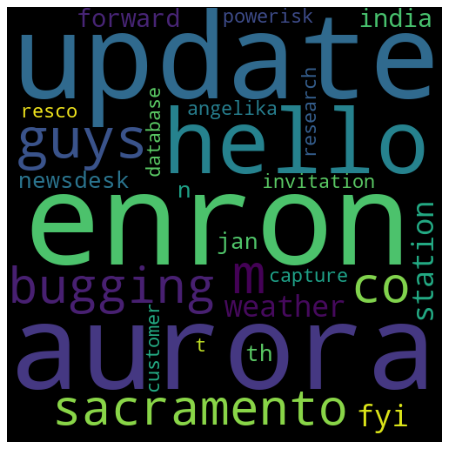

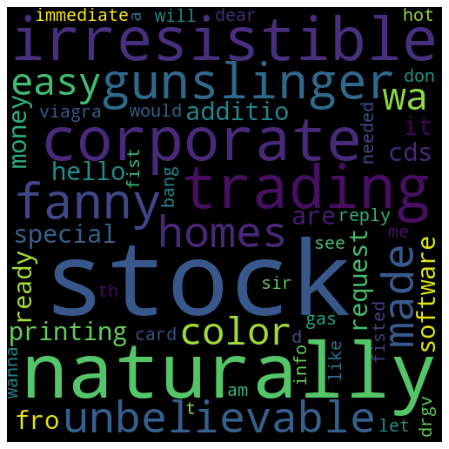

In [7]:
#Construct the word cloud
df1 =df.loc[df.spam==0]
df2 =df.loc[df.spam==1]
#remove stop words
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']
#set the word cloud parameters
wordcloud1 = WordCloud(width = 500, height = 500, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df1['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

wordcloud2 = WordCloud(width = 500, height = 500, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df2['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()
#The larger the font size, the higher its frequency in the data set.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score
#list of sentences
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]
#instantiate the class
cv = CountVectorizer()
# tokenize and build vocab
cv.fit(text)
# summarize
print(cv.vocabulary_)
# encode document
vector = cv.transform(text)
# summarize encoded vector
print(vector.toarray())

{'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
#Convert a collection of text documents to a matrix of token counts.
text_vec = CountVectorizer().fit_transform(df['text']) 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45
                                                    , random_state = 42, shuffle = True)

classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 100, #how many decision trees to build
    learning_rate = 0.5, #controls rate at which additional decision trees influes overall prediction
    max_depth = 6, 
#     min_samples_split = 21,
#     min_samples_leaf = 19, 
    #max_features = 0.9,
    #loss = 'huber'
)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.90      0.94       637

    accuracy                           0.97      2563
   macro avg       0.97      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563



In [14]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2401
           1       1.00      1.00      1.00       731

    accuracy                           1.00      3132
   macro avg       1.00      1.00      1.00      3132
weighted avg       1.00      1.00      1.00      3132

Confusion Matrix: 
 [[2401    0]
 [   0  731]]

Accuracy:  1.0


In [15]:
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))

print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.90      0.94       637

    accuracy                           0.97      2563
   macro avg       0.97      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563

Confusion Matrix: 
 [[1915   11]
 [  64  573]]

Accuracy:  0.9707374170893485


In [20]:
from textblob import TextBlob
#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
df.head(5)

,index,text,spam,tb_Pol,tb_Subj,tb_Sub
0,0,subject naturally irresistible your corporate ...,1,0.296607,0.546905,0.546905
1,1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698,0.562698
2,2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581,0.480581
3,3,subject color printing special request additio...,1,0.163492,0.468254,0.468254
4,4,subject do not have money get software cds fro...,1,0.433333,0.395833,0.395833
